In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

In [70]:
data_cam_df = pd.read_csv('xcms_pigs_camera.csv', sep = ',', index_col=0)

In [71]:
service_cols = ["mz", "mzmin", "mzmax", "rt", "rtmin", "rtmax", ".", "npeaks", "isotopes", "adduct", "pcgroup"]
assert len(set(service_cols) - set(data_cam_df.columns))==0
samples_cols = list(set(data_cam_df.columns) - set(service_cols))

In [72]:
data_cam_df[data_cam_df==0]=np.nan
data_cam_df[samples_cols] = np.log(data_cam_df[samples_cols])

## standards

#### TAG

In [73]:
new_mz_palm = np.abs((data_cam_df['mz'] - 811.765)) / 811.765 
new_mz_palm = new_mz_palm * 1000000
sunf_ppm_palm = data_cam_df[new_mz_palm<13]

In [74]:
sunf_ppm_palm.head()
sunf_ppm_palm.index

Int64Index([2011], dtype='int64')

In [75]:
RO=pd.Series([i.split('_')[3][1:] if 'S' in i else i for i in data_cam_df.columns],index=data_cam_df.columns)

In [76]:
for i in RO.index:
    try:
        RO[i]=int(RO[i])
    except:
        RO[i]=np.nan

In [77]:
RO=RO.dropna()


#### LPS

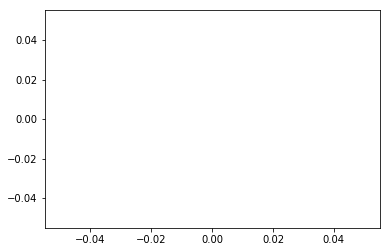

In [78]:
plt.scatter(RO,data_cam_df.loc[1,RO.index], color = 'rebeccapurple')

#### filtration by rt
rt(sec) -> rt(min)

In [79]:
rt_in_min = data_cam_df['rt']/60
data_cam_df['rt'] = rt_in_min
data_cam_filt_rt_df = data_cam_df[(data_cam_df['rt'] > 0.6) & (data_cam_df['rt'] < 19)]
data_cam_filt_rt_df.head(4)

,mz,mzmin,mzmax,rt,rtmin,rtmax,npeaks,.,X171206_pigs_scat1_3_15_pos_1.100,X171207_pigs_BF1_10_1.50_pos,...,X171208_pigs_scat2_15_1.100_pos,X171208_pigs_scat2_18_1.100_pos,X171208_pigs_scat2_2_1.100_pos,X171208_pigs_scat2_3_1.100_pos,X171208_pigs_scat2_6_1.100_pos,X171208_pigs_scat2_8_1.100_pos,X171208_pigs_scat2_9_1.100_pos,isotopes,adduct,pcgroup
1,130.158684,130.158150,130.159207,0.660983,38.049,127.265,79,75,11.640429,12.005639,...,11.927535,11.867717,12.015332,12.048855,11.646204,12.103320,11.972464,NaN,NaN,105
2,133.100423,133.099922,133.101013,3.391133,202.231,204.805,69,69,10.248525,11.050215,...,10.273095,9.808182,10.138165,9.222282,10.018860,10.075920,9.181783,NaN,[M+3H-C6H10O4]3+ 542.333,37
3,147.064214,147.063614,147.064651,0.970192,56.181,61.209,74,73,11.269131,8.689696,...,9.952731,9.736448,10.247801,9.891781,10.268355,9.772705,9.975347,NaN,[M+3H-CH2]3+ 452.189 [M+2H-C6H8O6]2+ 468.159,17
4,149.022196,149.021515,149.022699,4.672275,268.144,286.492,140,75,14.002570,13.957953,...,14.030105,14.237696,14.040697,14.005739,14.212340,14.243009,14.031754,NaN,NaN,61


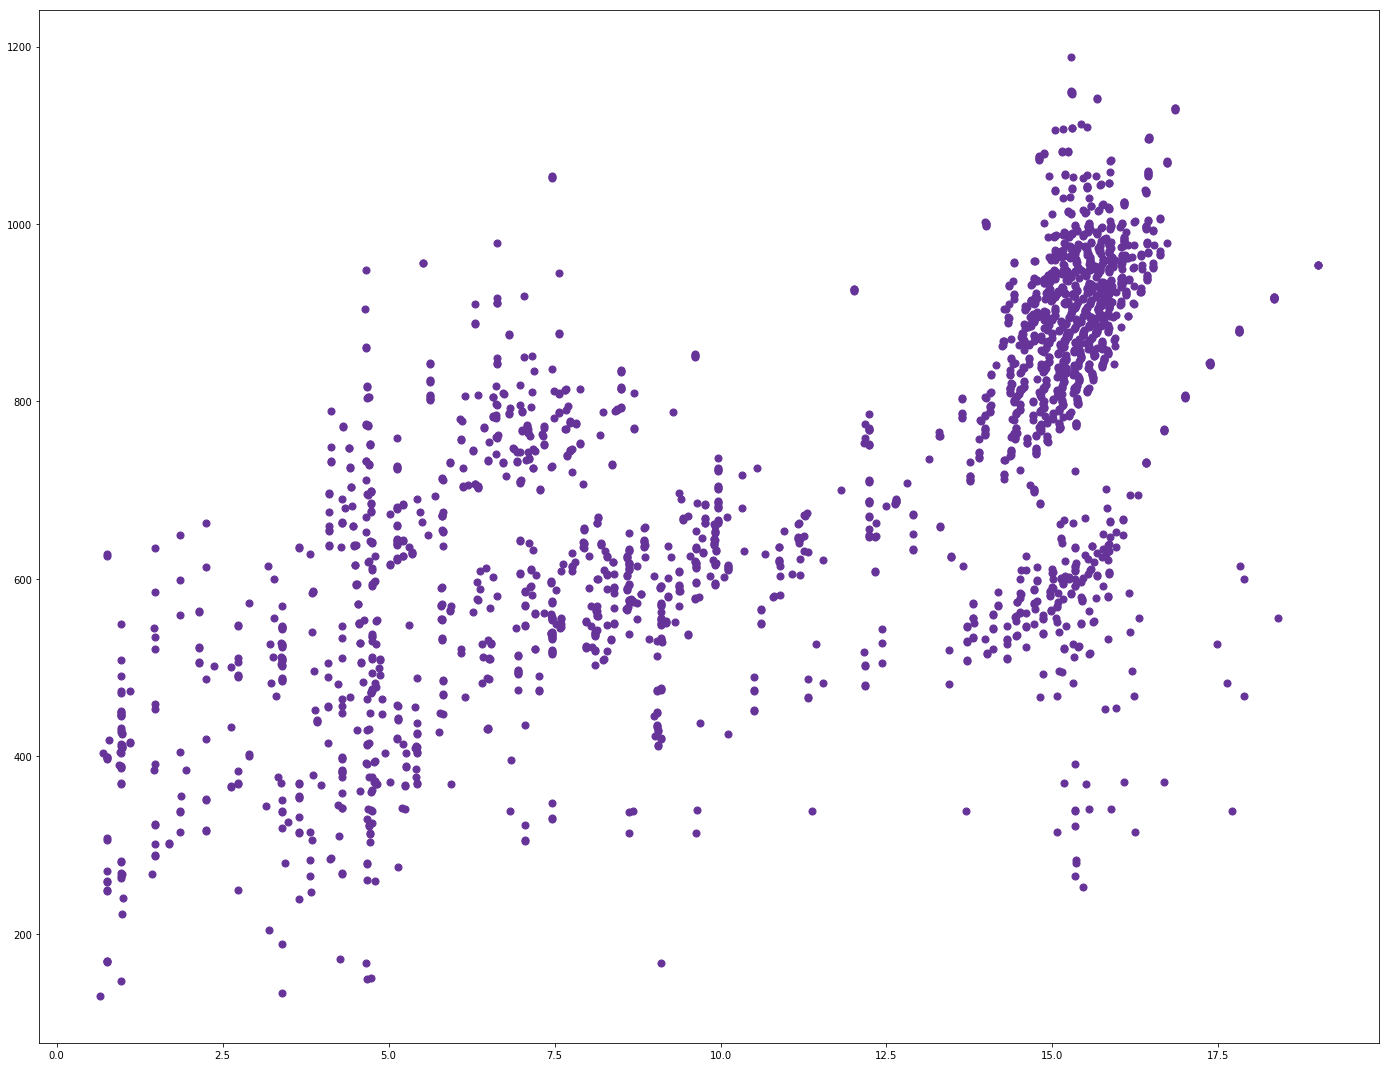

In [80]:
plt.gcf().set_size_inches(24,19)
plt.scatter(data_cam_filt_rt_df['rt'], data_cam_filt_rt_df['mz'], color = 'rebeccapurple', s = 50)

In [81]:
del_isotopes = data_cam_filt_rt_df['isotopes'].str.match(r'\[\d+\]\[M\+\d+\]\+').fillna(False)
#[m][M+n]+ где n от 1, m from 1
data_cam_filt_rt_iso_df = data_cam_filt_rt_df[~del_isotopes]

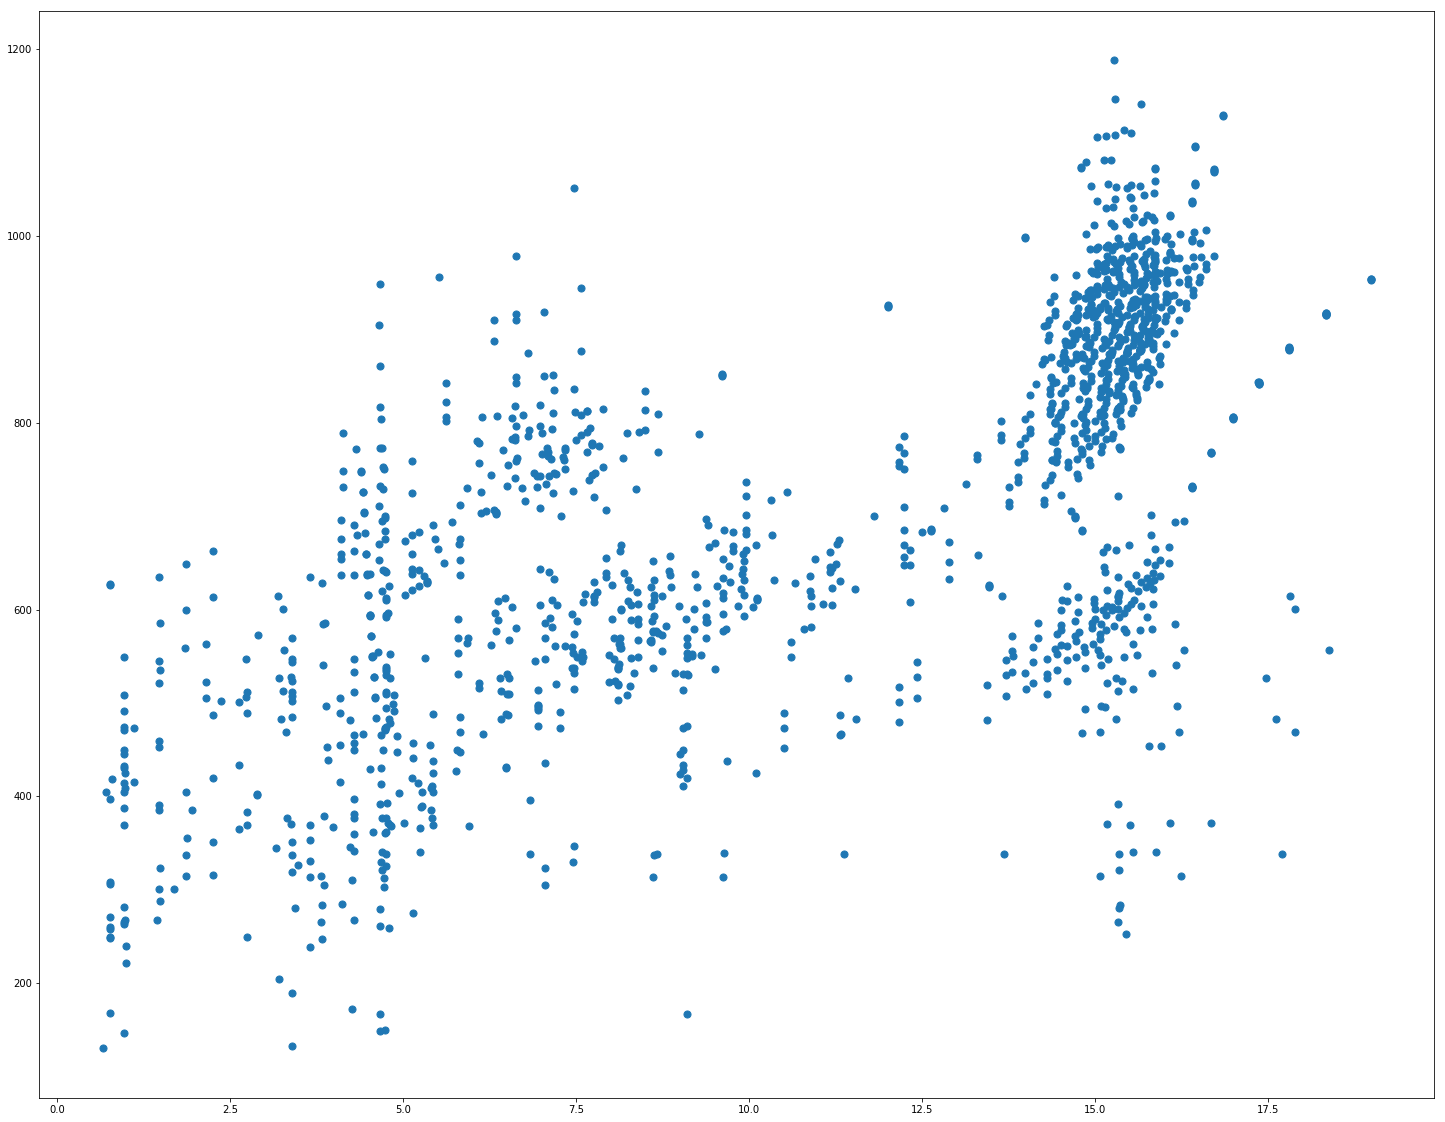

In [82]:
plt.gcf().set_size_inches(25,20)
plt.scatter(data_cam_filt_rt_iso_df['rt'], data_cam_filt_rt_iso_df['mz'], s = 50)



### PCA

In [83]:
lm1_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'LM1' in col]]
lm2_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'LM2'  in col]]
lm3_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'LM3' in col]]
bf1_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'BF1' in col]]
bf2_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'BF2' in col]]
bf3_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'BF3' in col]]
scat1_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'scat1' in col]]
scat2_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'scat2' in col]]

In [121]:
X.shape

(8, 5064)

Average MSE 0.2471364039941183
Std MSE 0.029250400401620642


MSE 0.4090785531590788


'LMFA11000592;LMFA11000636;LMFA11000637;LMFA11000638;LMFA11000659'

## scat1

In [128]:
X, Y = pigs_vectors(["BF1", "BF2", "BF3", "LM1", "LM2", "LM3"], ["scat1"])

ValueError: need at least one array to concatenate

## MDS

Automatically created module for IPython interactive environment
